In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
au       = 1.496e13      # cm
M_sun    = 1.988e+33     # g
yr       = 3.15576e7     # s
sigma_sb = 5.6703744e-5  # g/(s**3 K**4)

# Question 1

A *spherically symmetric* mass distribution is given in file `data.dat`. You can download this file [here](https://dl.dropboxusercontent.com/s/e9bev0fg21ygrqh/data.dat). The first column is the radial coordinate in cm, the second column the density in g/cm$^3$. Calculate the total mass of this distribution in solar masses and the radial optical depth assuming a constant opacity of $\kappa = 2 \frac{\mathrm{cm^2}}{\mathrm{g}}$.

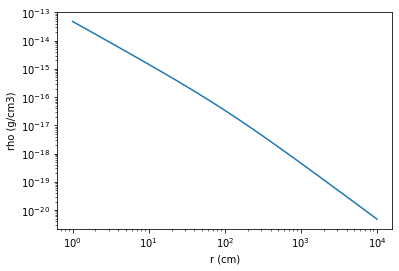

In [3]:
kappa = 2.0

r, rho = np.loadtxt('data.dat').T

f, ax = plt.subplots()
ax.set_xlabel('r (cm)')
ax.set_ylabel('rho (g/cm3)')
ax.loglog(r / au, rho);

In [4]:
def tau(kappa,rho,r):
    tau = 0
    for i in range(len(r)-1):
        tau += rho[i]*(r[i+1]-r[i])
    tau *= kappa
    return tau

In [5]:
tau_r = tau(2.0,rho,r)
print(f'tau_r = {tau_r:.2g}')

tau_r = 2.8


In [6]:
def mass(rho,r):
    m = 0
    for i in range(len(r)-1):
        m += rho[i]*4*np.pi*r[i]**2*(r[i+1]-r[i])
    return m

In [7]:
M = mass(rho,r)
print(f'total mass = {M / M_sun:.2g} M_sun')

total mass = 0.1 M_sun


# Question 2: Integration

Integrate the following equation forward in time:

$$\mathsf{ \Sigma \, c_v \,  \frac{dT}{dt} = q - \sigma_{SB} \, T^4}$$

The initial condition is $T = 10^4\,\mathsf{K}$ at time $t=0$. You can write your own integrator (first order is fine) or use available libraries.

Integrate up to 0.01 years. What temperature is reached at $t=0.01$ years? How about at $t = \infty$?

\begin{align}
c_v     &= 5.422 \times 10^7 \, \mathrm{erg / (g \cdot K)} \\
q       &= 5670 \, \mathrm{erg / (s \cdot cm^2)} \\
\Sigma  &= 10^3 \,  \mathrm{g / cm^2}
\end{align}

In [8]:
cv  = 5.422e7  # erg / (g * K)
T0  = 1e4      # K
q   = 5670.38  # erg / (s * cm**2)
Sig = 1e3      # g / cm^2
k = Sig*cv

#initial conditions
tmin, tmax = 0, 0.01*yr
dt = 0.1

In [9]:
#function I want to integrate
#dT/dt = f(T)
def fn(T,k,q,sb): return (q-sigma_sb*T**4)/k

In [10]:
t = np.arange(tmin,tmax,dt)
Npoints = len(t)
T = np.zeros_like(t)
T[0] = T0
for i in range(Npoints-1):
        T[i+1] = T[i] + fn(T[i],k,q,sigma_sb)*dt #simple euler
solution = T

T at 0.01 year = 1003 K
T at infinity tends to 0 K


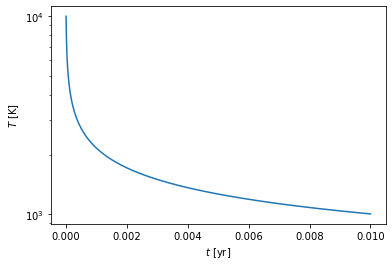

In [11]:
f, ax = plt.subplots()
ax.semilogy(t / yr, solution)
ax.set_xlabel('$t$ [yr]')
ax.set_ylabel('$T$ [K]')
print(f'T at 0.01 year = {solution[-1]:.4g} K')
print(f'T at infinity tends to 0 K')